# Titanik Project EDA + Machine Learning
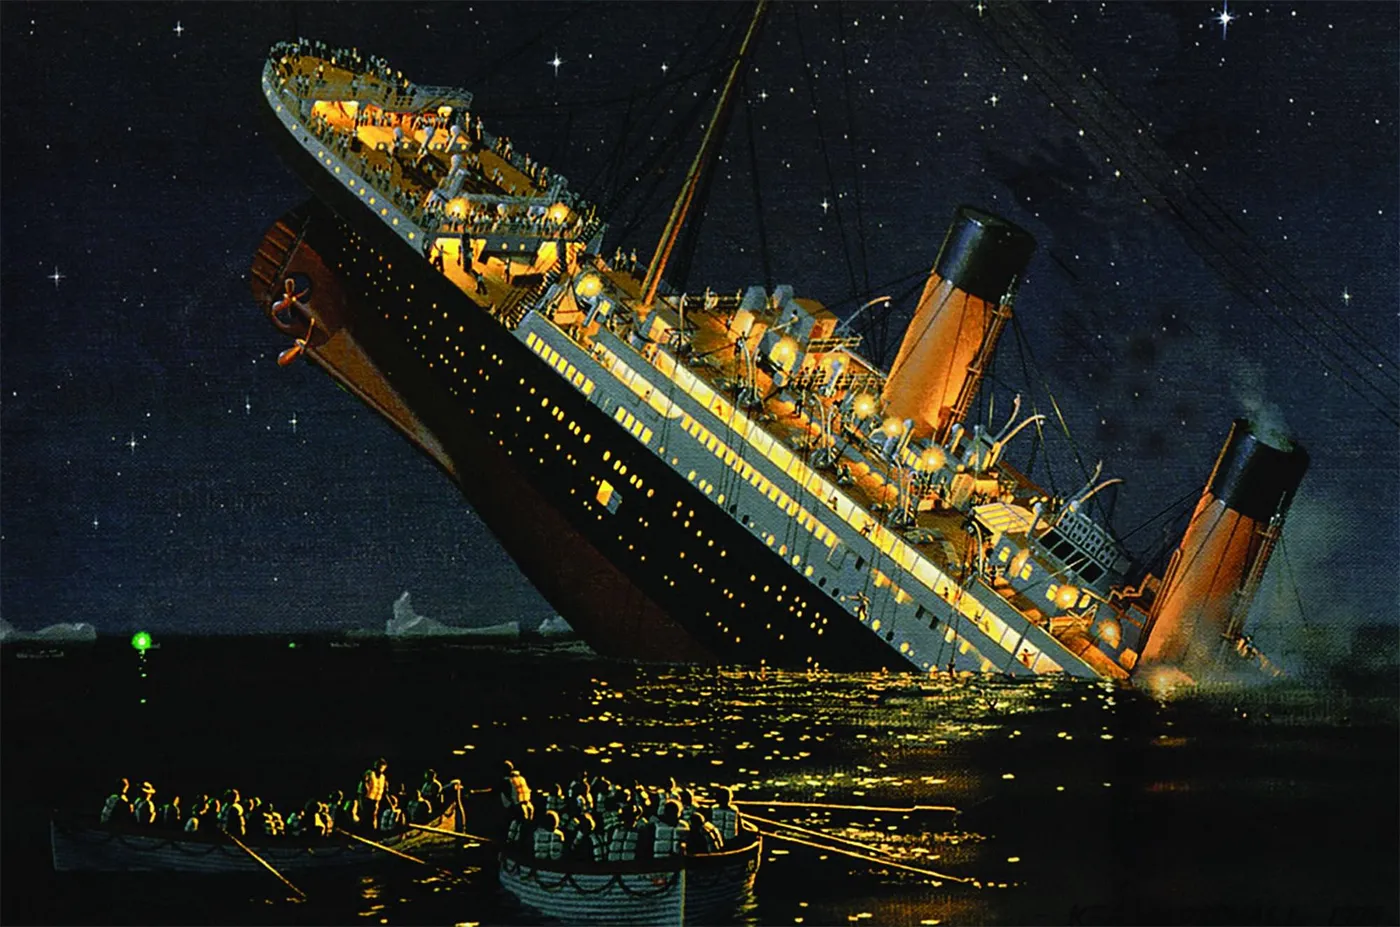

**Titanik, 15 Nisan 1912'de bir buzdağına çarparak batan ünlü bir deniz felaketidir. Bu felakette birçok insan hayatını kaybetti, sadece küçük bir kısmı mucizevi bir şekilde hayatta kaldı. Zamanının en büyük ve en lüks yolcu gemisi olarak bilinen Titanik, dünya tarihinin en ikonik gemi enkazlarından biri olmaya devam etmektedir. Bugün bile, son derece büyüleyici bir tarihi olay olmaya devam etmektedir.**

## İçindekiler:

* [**1.** Kütüphane ve Dosyaların İçeri Aktarılması](#1)

* [**2.** Verinin Yüklenmesi ve Kontrol Edilmesi](#2)

* [**3.** Verilerin Bilgileri](#3)

    * [Tek Değişkenli Değişken Analizi](#4)

    * [Kategorik Değişken](#5)

    * [Sayısal Değişken](#6)

    * [Analiz Sonucu](#7)
 
* [**4.** Basit Veri Analizi](#8)

<a id = "1"></a>
# 1. Kütüphane ve Dosyaların İçeri Aktarılması

In [92]:
!pip install seaborn

In [93]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

import seaborn as sns
sns.color_palette("crest", as_cmap=True)

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id = "2"></a>
# 2. Verinin Yüklenmesi ve Kontrol Edilmesi

In [94]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [95]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="3"></a>
# 3. Veri Bilgileri

Kullandığımız verilerde 12 özellik bulunmaktadır.

Özellikler:
1. PassengerId => Her yolcuya ait benzersiz kimlik numarası

2. Survived => Yaşam durumunu gösterir (1) hayatta (0) ölü anlamına gelir

3. Pclass => Yolcu sınıfını belirtir; üç farklı sınıf vardır.

4. Name => Yolcunun adı

5. Sex => Yolcunun cinsiyetini gösterir

6. Age => Yolcunun yaşı

7. SibSp => Yolcunun gemide bir kardeşi veya eşi olup olmadığını gösterir

8. Parch => Yolcunun gemide bir ebeveyni veya çocuğu olup olmadığını gösterir.

9. Bilet => Yolcunun bilet numarası

10. Ücret => Yolcunun bilet için ödediği ücret

11. Kabin => Yolcunun kaldığı oda numarası

12. Biniş => Yolcunun bindiği liman (C = Cherbourg, S = Southampton, Q = Queenstown)

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id="4"></a>
## 3.1 Tek Değişkenli Değişken Analizi
* **A) Kategorik Değişken: İki veya daha fazla kategoriden oluşan özellikler**
* **B) Sayısal Değişken: Sayılardan oluşan değişken**

### A) Kategorisel Veriler
* **Survived**

* **Sex**

* **Pclass**

* **Embarked**

* **Cabin**

* **Name**

* **Sibsp**

* **Parch**

In [99]:
def bar_plot(variable):
    var=train_df[variable]

    varValue = var.value_counts()

    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Veri Kıyaslama")
    plt.title(variable)
    plt.show()
    print("{}".format(varValue))

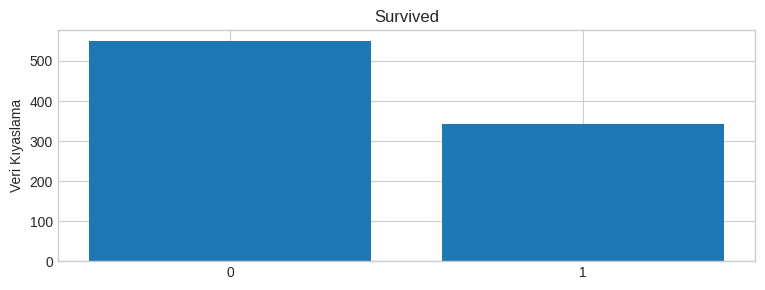

Survived
0    549
1    342
Name: count, dtype: int64


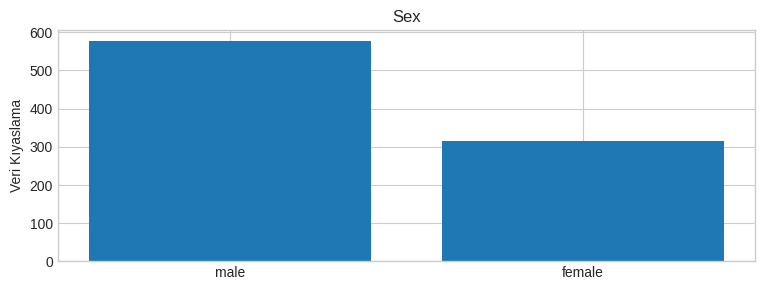

Sex
male      577
female    314
Name: count, dtype: int64


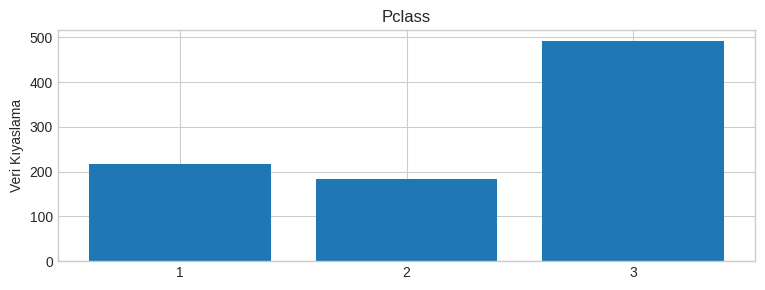

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


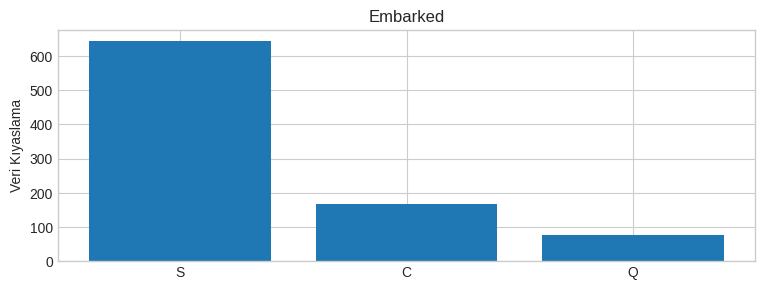

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


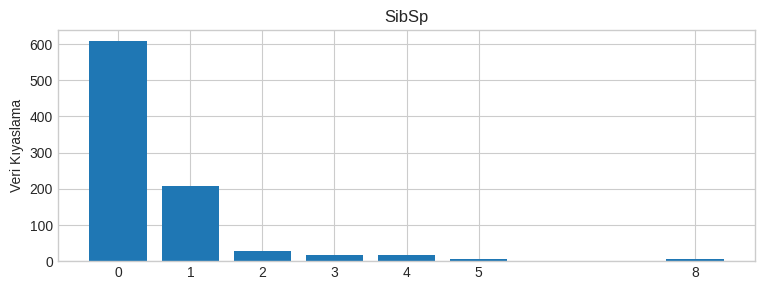

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


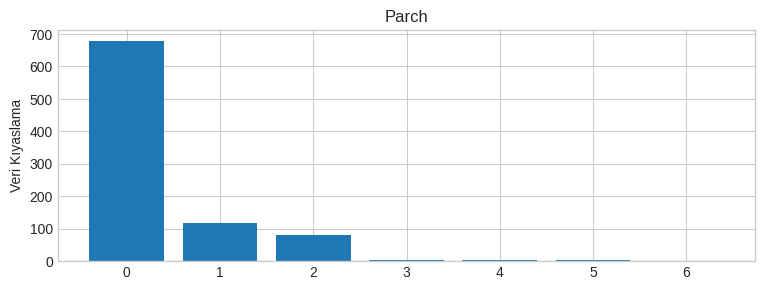

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [100]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for i in category1:
    bar_plot(i)

In [101]:
category2 = ["Cabin", "Name", "Ticket"]

for i in category2:
    print("{}:\n _________________________________________\n {} \n \n".format(i,train_df[i].value_counts))

Cabin:
 _________________________________________
 <bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object> 
 

Name:
 _________________________________________
 <bound method IndexOpsMixin.value_counts of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: N

### B) Sayısal Değişken
* **Fare**

* **Age**

* **PassengerId**

In [102]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 80)
    plt.xlabel(variable)
    plt.ylabel("veri içeriği")
    plt.title("{} verisinin histogramı".format(variable))
    plt.show()

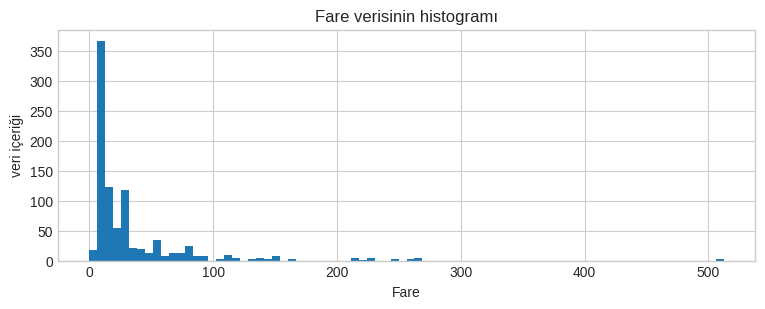

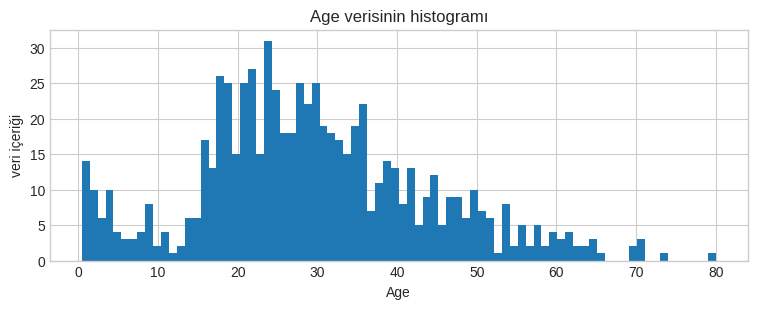

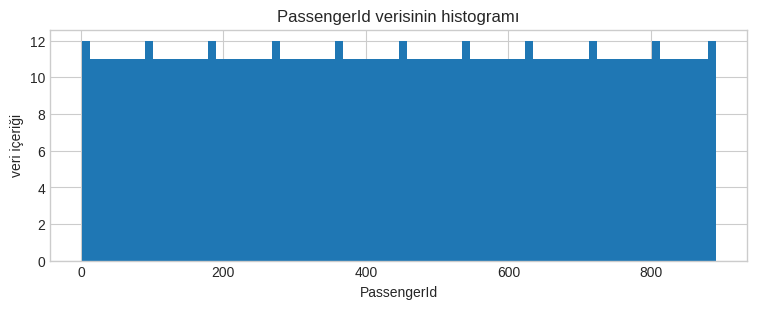

In [103]:
numericVar = ["Fare", "Age", "PassengerId"]
for i in numericVar:
    plot_hist(i)

### Analiz Sonucu
Bu veri analizindeki en dikkat çekici nokta, PassengerId verisidir; çünkü verilerin grafiği incelendiğinde, anlamsız ve genel olarak işe yaramaz görünmektedir.

Örneğin, verilerin geri kalan içeriğini yorumlamamız gerekirse, gemide daha fazla erkek olması, ölüm oranlarında cinsiyet yoğunlaşmasının erkeklerde olduğunu gösterebilir.

Başka bir analiz ise şöyledir: Kalkış limanları dikkate alındığında, Southampton limanından binen kişi sayısı en yüksektir; bu da Southampton limanından binen kişilerin ölüm oranında yoğunlaşmış olabileceğini göstermektedir.

Başka bir analiz ise şöyledir: Bu analizde, iki grafiği aynı anda inceleyeceğiz. Pclass grafiğine baktığımızda, 3. sınıf yolcuların yoğunlaştığı görülmektedir; aynı şekilde, Ücret grafiğine baktığımızda da yolcuların çoğunluğunun 10 dolarlık bilet aldığını görüyoruz. Bu da gemideki yolcuların çoğunluğunun o dönemde alt sınıfa mensup kişilerden oluştuğu anlamına gelir; yani bu yolcuların ölüm oranında yoğunlaştığı söylenebilir. Ayrıca, o dönemin koşulları göz önüne alındığında, soylu ve zengin yolcuların gemiden ilk önce tahliye edilmiş olması çok muhtemeldir ki bu da grafik yorumumuzu doğrulamaktadır.

----

<a id="8"></a>
# Basit Veri Analizi

* **Özelliklere Dayalı Ölüm Oranları İncelenecektir**

### Veriler:
1. **Pclass - Survived**
2. **Sex - Survived**
3. **SibSP - Survived**
4. **Parch - Survived**

In [104]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [105]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [106]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [107]:
train_df[train_df["SibSp"] ==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [108]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outlier Detection
* Bir verinni Q1 - 1.5*IQR lik yada Q3+1.5*IQR diliminin dışında kalacak akdar uç ve çıkıntı verilerin analizi anomalileri bulmak için kullanılır

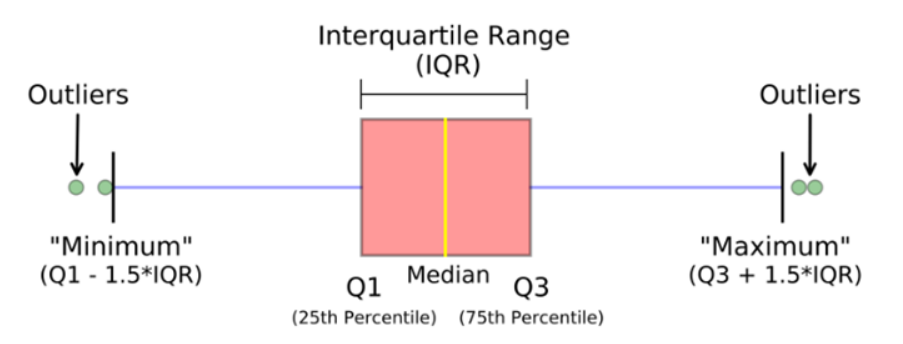

# ÖRNEK ÇALIŞMA
* **Örnek Veri** [2 3 4 5 6 7 8 30]

* **Q2 MEDİAN = 5.5**

* **Q1 = 3.5**

* **Q3 7.5**

* **IQR = Q3-Q1 = 4**

* **MİNİMUM DEĞER Q1-1.5*IQR  => 3.5-1.5*4  => -2.5**

* **MAKSİMUM DEĞER Q3 + 1.5*IQR => 7.5+1.5*4 => 13.5**

Sonuç: Ozaman -2.5 altındaki değerler datam için anomali 13.5 üstündeki değerlerde datam için anomali

In [109]:
def detect_outlier(df, feature):
    outlier_list = []
    for c in feature:

        Q1 = np.percentile(df[c], 25)

        Q3 = np.percentile(df[c], 75)

        IQR = Q3-Q1

        outlier_step = IQR*1.5

        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        outlier_list.extend(outlier_list_col)

    outlier_list = Counter(outlier_list)
    multiple_outliers = list(i for i, v in outlier_list.items() if v > 2)
    return multiple_outliers

In [110]:
train_df.loc[detect_outlier(train_df, ["Age","SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [111]:
#Drop Outliers
train_df = train_df.drop(detect_outlier(train_df,["Age", "SibSp", "Parch", "Fare"]),axis=0).reset_index(drop=True)

In [112]:
train_df.loc[detect_outlier(train_df, ["Age","SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# 6. Eksik Değerler
* **A. Eksik Değerlerin Bulunması**
* **B. Eksik Değerlerin Doldurulması**

In [113]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df], axis = 0).reset_index(drop=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
print("Özelliklerde Eksik Deperler: \n")
train_df.columns[train_df.isnull().any()]

Özelliklerde Eksik Deperler: 



Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [115]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          1007
Survived        418
Age             256
Embarked          2
Fare              1
Name              0
PassengerId       0
Pclass            0
Parch             0
SibSp             0
Sex               0
Ticket            0
dtype: int64

In [116]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


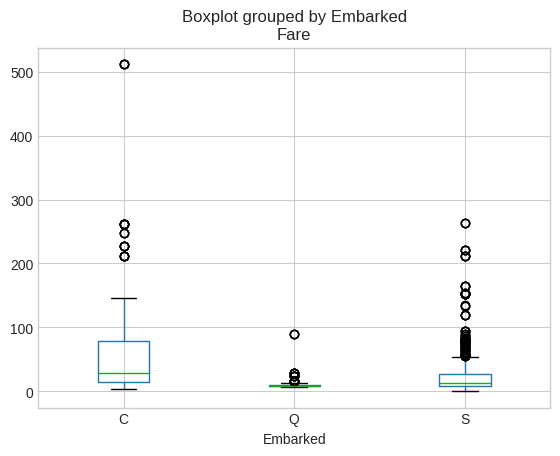

In [117]:
train_df.boxplot(column ="Fare", by= "Embarked")
plt.show()

In [118]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df.loc[[821,60]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C


In [119]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [120]:
print("3.SINIF ÜCRET ORTALAMASI \n")
print(np.mean(train_df[(train_df["Pclass"] == 3) & (train_df["SibSp"] == 0) & (train_df["Parch"] == 0)]["Fare"]))

3.SINIF ÜCRET ORTALAMASI 

9.096707218683653


In [121]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[(train_df["Pclass"] == 3) & (train_df["SibSp"] == 0) & (train_df["Parch"] == 0)]["Fare"]))


In [122]:
train_df.loc[[1033]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,9.096707,NaN,S


# 7.Görselleştirme

A) Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

B) Relationship Analysis Sibsp -- Survived

C) Relationship Analysis Parch -- Survived

D) Relationship Analysis Pclass -- Survived

E) Relationship Analysis Age -- Survived

F) Relationship Analysis Pclass -- Survived -- Age

G) Relationship Analysis Embarked -- Sex -- Pclass -- Survived

H) Relationship Analysis Embarked -- Sex -- Fare-- Survived

## A) Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

<Axes: >

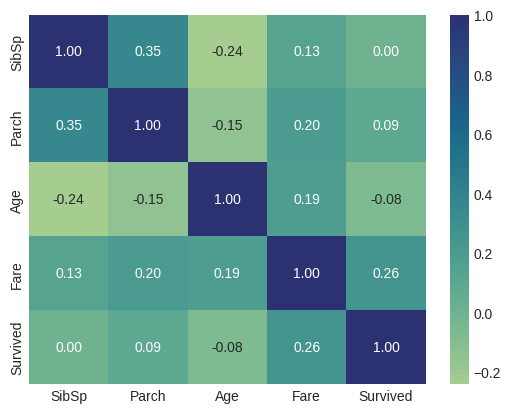

In [123]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, cmap="crest", fmt = ".2f")

## B) Relationship Analysis Sibsp -- Survived

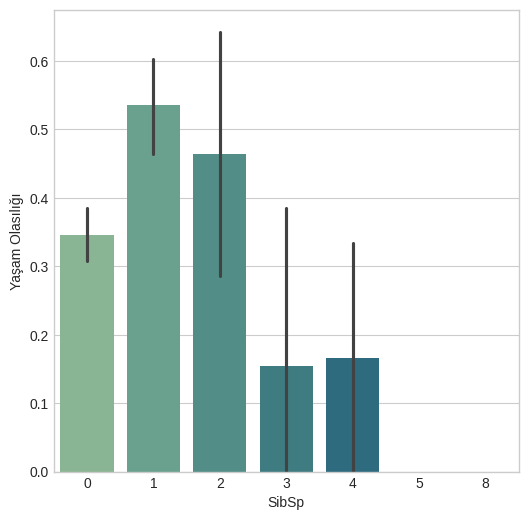

In [124]:
plt.figure(figsize=(6,6))
g = sns.barplot(x="SibSp", y="Survived", data = train_df, palette="crest", legend=False)
g.set_ylabel("Yaşam Olasılığı")
plt.show()

## C) Relationship Analysis Parch -- Survived¶

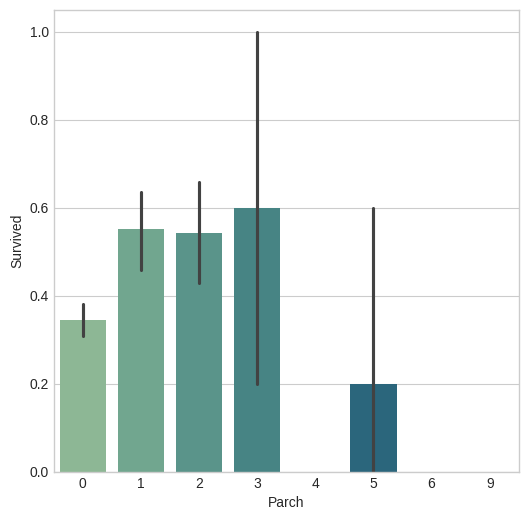

In [125]:
plt.figure(figsize=(6,6))
g = sns.barplot(x="Parch", y="Survived", palette ="crest", data=train_df)
plt.show()

## D) Relationship Analysis Pclass -- Survived

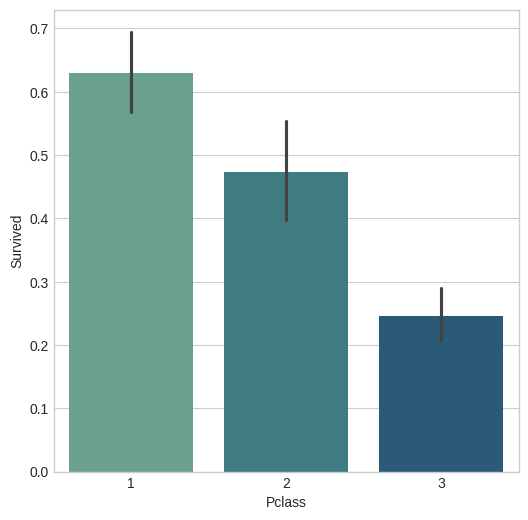

In [126]:
plt.figure(figsize=(6,6))
g = sns.barplot(x="Pclass", y="Survived", palette ="crest", data=train_df)
plt.show()

## E) Relationship Analysis Age -- Survived

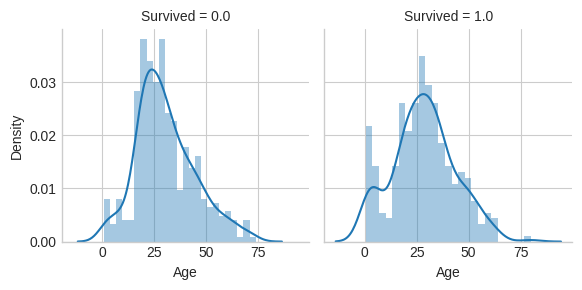

In [127]:
g = sns.FacetGrid(data = train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

## F) Relationship Analysis Pclass -- Survived -- Age

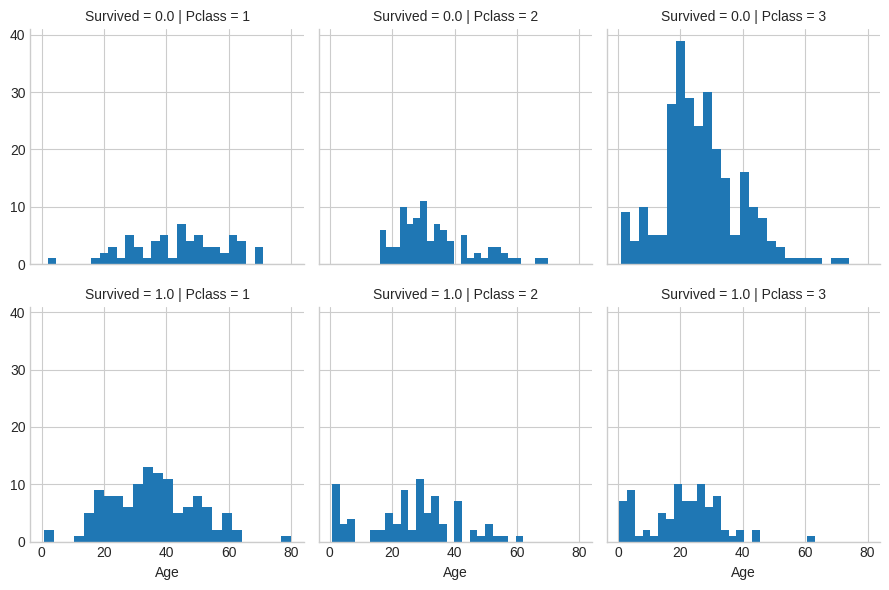

In [128]:
g = sns.FacetGrid(data = train_df, row="Survived", col="Pclass")
g.map(plt.hist,"Age",bins=25)

## G) Relationship Analysis Embarked -- Sex -- Pclass -- Survived

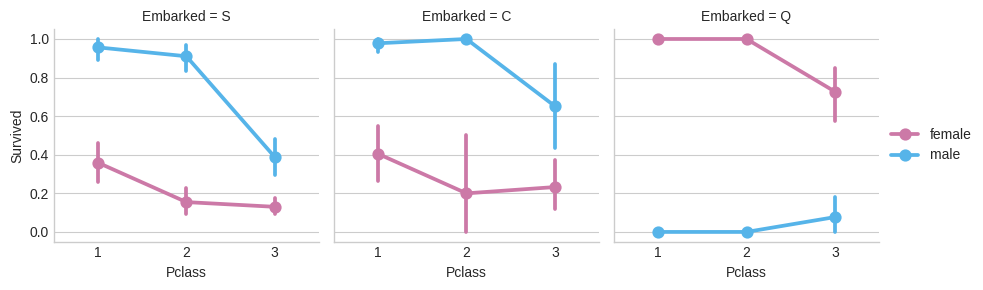

In [129]:
g = sns.FacetGrid(data=train_df, col = "Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex", palette=sns.color_palette(["#56B4E9","#CC79A7"]))
g.add_legend()
plt.show()

## H) Relationship Analysis Embarked -- Sex -- Fare-- Survived

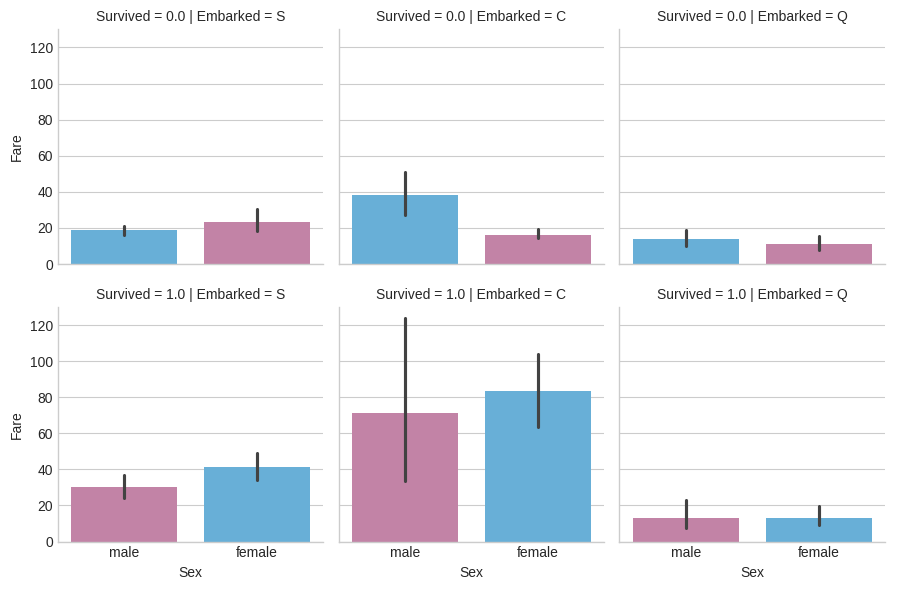

In [130]:
g = sns.FacetGrid(data = train_df, col="Embarked", row="Survived")
g.map(sns.barplot, "Sex", "Fare", palette=sns.color_palette(["#56B4E9","#CC79A7"]))
g.add_legend()
plt.show()

# 8. Fill Missing: Age Value
* A) Graph Analysis (Sex-Age)

* B) Graph Analysis (Sex-Age-Pclass)

* C) Graph Analysis (Sex-Age-Pclass)

* D) Graph Analysis (Collinearity)

* E) Age Prediciton

In [131]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## A) Graph Analysis (Sex-Age)

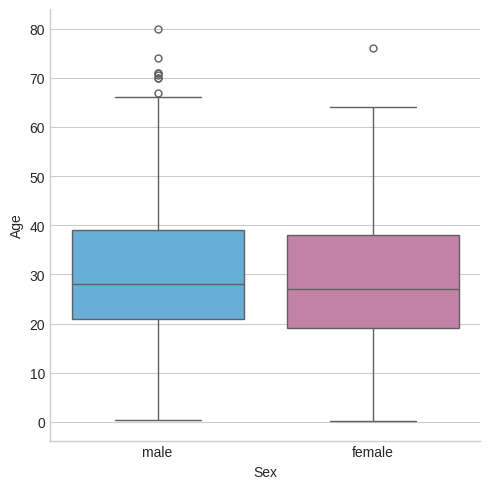

In [132]:
sns.catplot(x="Sex", y= "Age", data=train_df, kind = "box", palette=sns.color_palette(["#56B4E9","#CC79A7"]))
plt.show()

## B) Graph Analysis (Sex-Age-Pclass)

<Figure size 1000x1000 with 0 Axes>

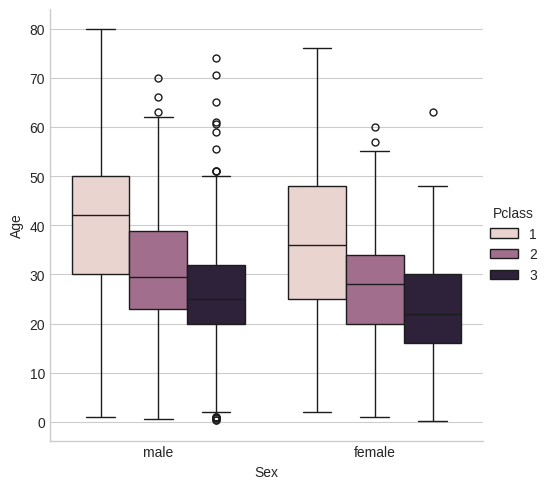

In [133]:
plt.figure(figsize=(10,10))
sns.catplot(x="Sex", y="Age", hue="Pclass", data = train_df, kind="box")
plt.show()

## C) Graph Analysis (Sex-Age-Pclass)

<Figure size 1000x1000 with 0 Axes>

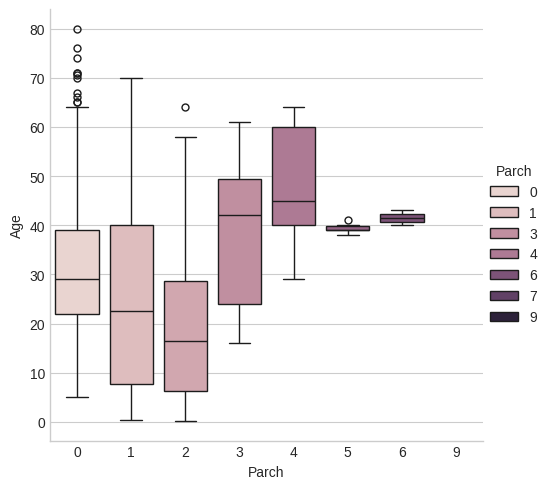

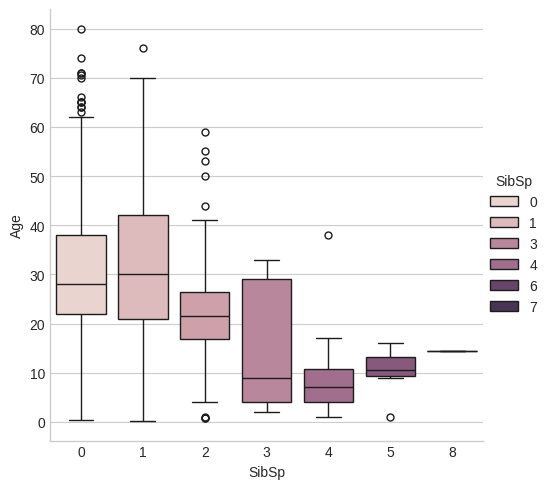

In [134]:
plt.figure(figsize=(10,10))
sns.catplot(x="Parch", y="Age", hue = "Parch", data= train_df, kind = "box")
sns.catplot(x="SibSp", y="Age", hue="SibSp", data= train_df, kind = "box")
plt.show()

## D) Graph Analysis (Collinearity)

In [135]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

<function matplotlib.pyplot.show(close=None, block=None)>

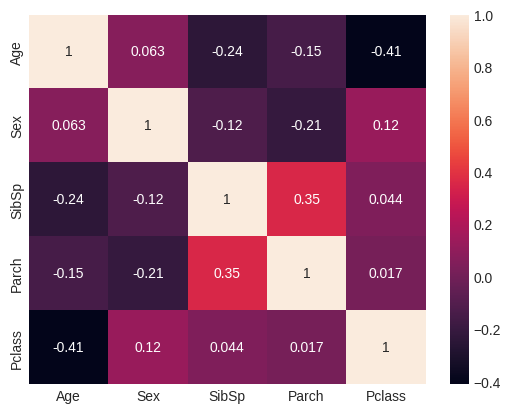

In [136]:
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(),annot=True)
plt.show

In [137]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",0,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",0,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


## E) Age Prediciton

In [138]:
index_nan_age = list(train_df[train_df["Age"].isnull()].index)

# Sütunu sayıya çevir
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
global_median = train_df["Age"].median()

for i in index_nan_age:
    condition = (
        (train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & 
        (train_df["Parch"] == train_df.iloc[i]["Parch"]) & 
        (train_df["Pclass"] == train_df.iloc[i]["Pclass"])
    )
    
    age_pred = train_df.loc[condition, "Age"].median()

    if not np.isnan(age_pred):
        # .iloc[i] yerine .at[i, "Age"] kullanmak atama hatalarını engeller
        train_df.at[i, "Age"] = age_pred
        print(train_df.loc[i])
    else:
        train_df.at[i, "Age"] = global_median

PassengerId                   6
Survived                    0.0
Pclass                        3
Name           Moran, Mr. James
Sex                           1
Age                        25.0
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object
PassengerId                              18
Survived                                1.0
Pclass                                    2
Name           Williams, Mr. Charles Eugene
Sex                                       1
Age                                    30.0
SibSp                                     0
Parch                                     0
Ticket                               244373
Fare                                   13.0
Cabin                                   NaN
Embarked                                  S
Name: 17, dtype: object
PassengerId                         20
Su

In [139]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [140]:
print(train_df.loc[5])

PassengerId                   6
Survived                    0.0
Pclass                        3
Name           Moran, Mr. James
Sex                           1
Age                        25.0
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


# 9. Özellik Mühendisliği

* A) Name-Title
* B) Family Size
* C) Embarked
* D) Ticket
* E) Pclass

In [141]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [142]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

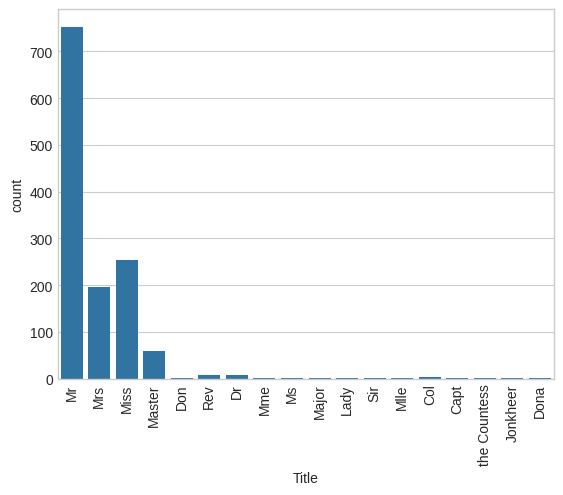

In [143]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=90)
plt.show()

In [144]:
train_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

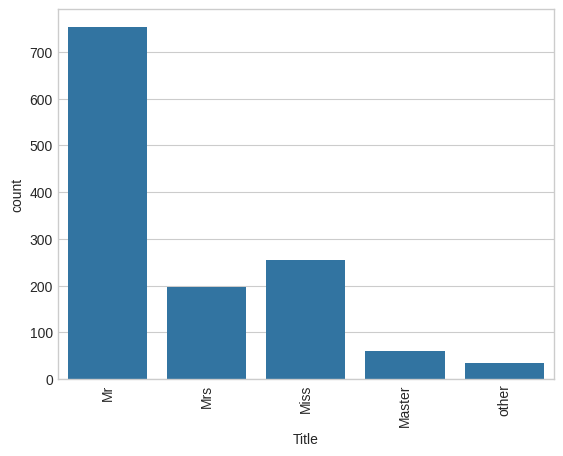

In [145]:
train_df["Title"] = train_df["Title"].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'],"other")
sns.countplot(x="Title",data=train_df)
plt.xticks(rotation=90)
plt.show()

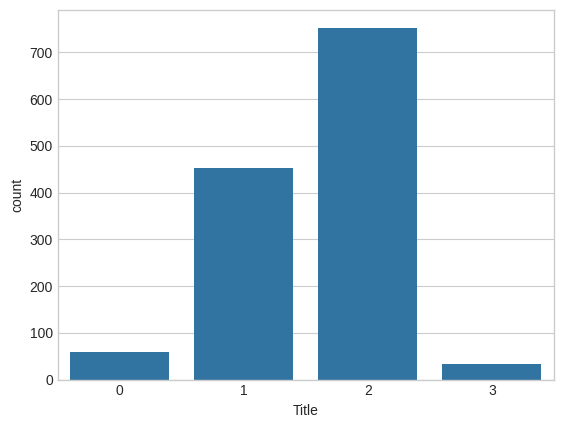

In [146]:
train_df["Title"] = [0 if i =="Master" else 1 if i == "Miss" or i =="Mrs" else 2 if i =="Mr" else 3 for i in train_df["Title"]]
sns.countplot(x="Title", data = train_df)
plt.show()

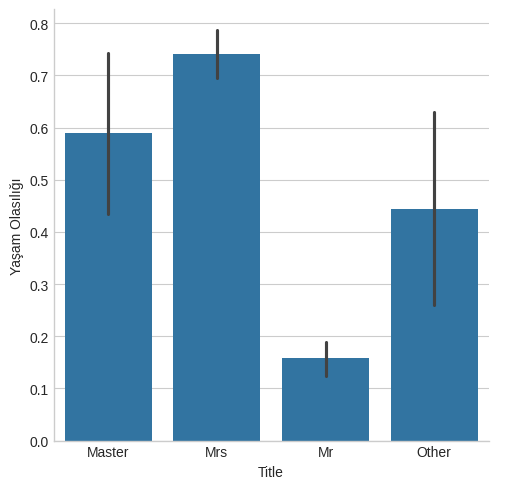

In [147]:
g = sns.catplot(x = "Title", y = "Survived", data = train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Yaşam Olasılığı")
plt.show()

In [148]:
train_df = pd.get_dummies(train_df, columns = ["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [149]:
train_df.drop(labels=["Name"],axis = 1, inplace = True)

In [150]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


# B) Family Size

In [151]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"]
train_df.drop(labels=["SibSp", "Parch"], axis = 1 , inplace = True)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,A/5 21171,7.2500,NaN,S,False,False,True,False,1
1,2,1.0,1,0,38.0,PC 17599,71.2833,C85,C,False,True,False,False,1
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,0
3,4,1.0,1,0,35.0,113803,53.1000,C123,S,False,True,False,False,1
4,5,0.0,3,1,35.0,373450,8.0500,NaN,S,False,False,True,False,0
5,6,0.0,3,1,25.0,330877,8.4583,NaN,Q,False,False,True,False,0
6,7,0.0,1,1,54.0,17463,51.8625,E46,S,False,False,True,False,0
7,8,0.0,3,1,2.0,349909,21.0750,NaN,S,True,False,False,False,4
8,9,1.0,3,0,27.0,347742,11.1333,NaN,S,False,True,False,False,2
9,10,1.0,2,0,14.0,237736,30.0708,NaN,C,False,True,False,False,1


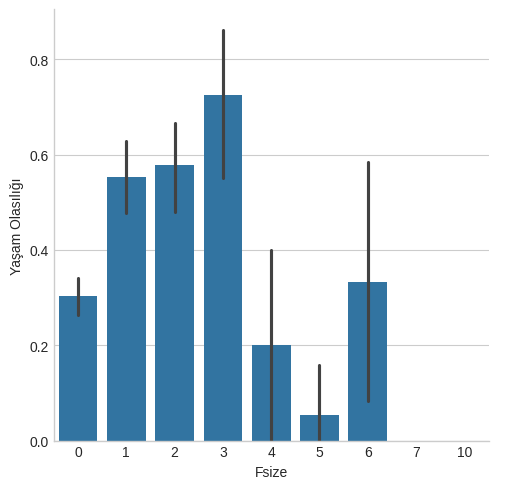

In [152]:
g = sns.catplot(x="Fsize", y="Survived", data = train_df, kind="bar")
g.set_ylabels("Yaşam Olasılığı")
plt.show()

In [153]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]
train_df.head(30)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,A/5 21171,7.2500,NaN,S,False,False,True,False,1,1
1,2,1.0,1,0,38.0,PC 17599,71.2833,C85,C,False,True,False,False,1,1
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,0,1
3,4,1.0,1,0,35.0,113803,53.1000,C123,S,False,True,False,False,1,1
4,5,0.0,3,1,35.0,373450,8.0500,NaN,S,False,False,True,False,0,1
5,6,0.0,3,1,25.0,330877,8.4583,NaN,Q,False,False,True,False,0,1
6,7,0.0,1,1,54.0,17463,51.8625,E46,S,False,False,True,False,0,1
7,8,0.0,3,1,2.0,349909,21.0750,NaN,S,True,False,False,False,4,1
8,9,1.0,3,0,27.0,347742,11.1333,NaN,S,False,True,False,False,2,1
9,10,1.0,2,0,14.0,237736,30.0708,NaN,C,False,True,False,False,1,1


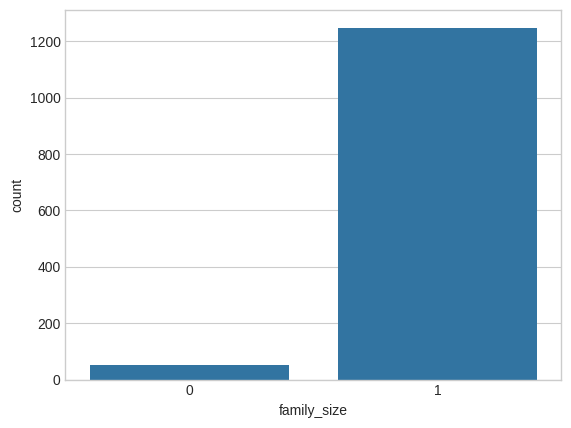

In [154]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

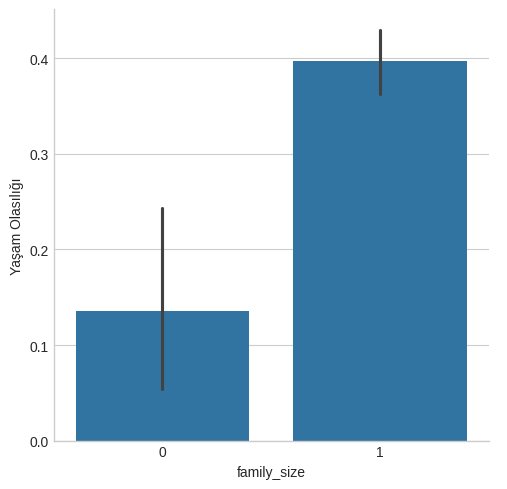

In [155]:
g = sns.catplot(x="family_size", y="Survived", data = train_df, kind="bar")
g.set_ylabels("Yaşam Olasılığı")
plt.show()

In [156]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,A/5 21171,7.2500,NaN,S,False,False,True,False,1,False,True
1,2,1.0,1,0,38.0,PC 17599,71.2833,C85,C,False,True,False,False,1,False,True
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,0,False,True
3,4,1.0,1,0,35.0,113803,53.1000,C123,S,False,True,False,False,1,False,True
4,5,0.0,3,1,35.0,373450,8.0500,NaN,S,False,False,True,False,0,False,True


# C) Embarked

In [157]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [158]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

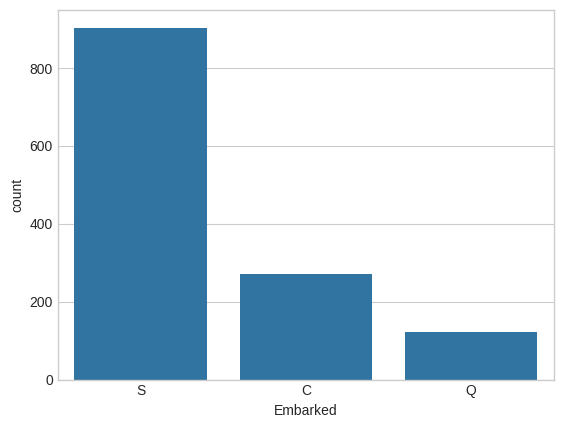

In [159]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [160]:
train_df = pd.get_dummies(train_df, columns = ["Embarked"])
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,A/5 21171,7.2500,NaN,False,False,True,False,1,False,True,False,False,True
1,2,1.0,1,0,38.0,PC 17599,71.2833,C85,False,True,False,False,1,False,True,True,False,False
2,3,1.0,3,0,26.0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,0,False,True,False,False,True
3,4,1.0,1,0,35.0,113803,53.1000,C123,False,True,False,False,1,False,True,False,False,True
4,5,0.0,3,1,35.0,373450,8.0500,NaN,False,False,True,False,0,False,True,False,False,True
5,6,0.0,3,1,25.0,330877,8.4583,NaN,False,False,True,False,0,False,True,False,True,False
6,7,0.0,1,1,54.0,17463,51.8625,E46,False,False,True,False,0,False,True,False,False,True
7,8,0.0,3,1,2.0,349909,21.0750,NaN,True,False,False,False,4,False,True,False,False,True
8,9,1.0,3,0,27.0,347742,11.1333,NaN,False,True,False,False,2,False,True,False,False,True
9,10,1.0,2,0,14.0,237736,30.0708,NaN,False,True,False,False,1,False,True,True,False,False


# D) Ticket

In [161]:
train_df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '330959', '349216', 'PC 17601', 'PC 17569',
       '335677', 'C.A. 24579', 'PC 17604', '113789', '2677', 'A./5. 2152',
       '345764', '2651', '7546', '11668', '349253', 'SC/Paris 2123',
       '330958', 'S.C./A.4. 23567', '370371', '14311', '2662', '349237',
       '3101295', 'A/4. 39886', 'PC 17572', '2926', '113509', '19947',
       'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144', '2669', '113572',
       '36973', '347088', 'PC 17605', '2661', 'C.A. 29395', 'S.P. 3464',
       '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879', '2680', '1601',
       '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./

In [162]:
tickets = []
for i in  list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [163]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"],prefix= "T")
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Title_0,Title_1,Title_2,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,0,38.0,71.2833,C85,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,0,26.0,7.9250,NaN,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,1,0,35.0,53.1000,C123,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,1,35.0,8.0500,NaN,False,False,True,...,False,False,False,False,False,False,False,False,False,True
5,6,0.0,3,1,25.0,8.4583,NaN,False,False,True,...,False,False,False,False,False,False,False,False,False,True
6,7,0.0,1,1,54.0,51.8625,E46,False,False,True,...,False,False,False,False,False,False,False,False,False,True
7,8,0.0,3,1,2.0,21.0750,NaN,True,False,False,...,False,False,False,False,False,False,False,False,False,True
8,9,1.0,3,0,27.0,11.1333,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1.0,2,0,14.0,30.0708,NaN,False,True,False,...,False,False,False,False,False,False,False,False,False,True


# E)Pclass

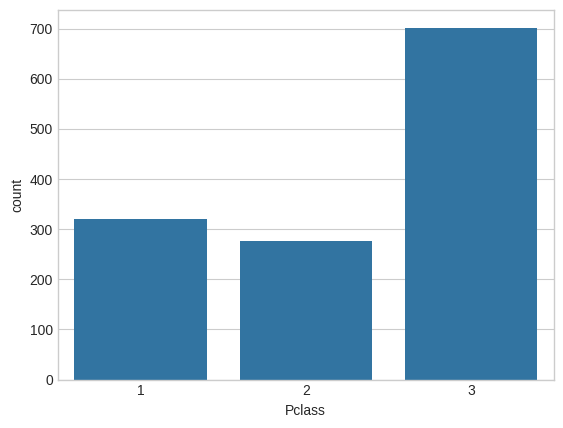

In [164]:
sns.countplot(x = "Pclass", data=train_df)
plt.show()

In [165]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,7.2500,NaN,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,0,38.0,71.2833,C85,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1.0,0,26.0,7.9250,NaN,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,4,1.0,0,35.0,53.1000,C123,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
4,5,0.0,1,35.0,8.0500,NaN,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [166]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,7.2500,NaN,False,False,True,False,1,...,False,False,False,False,False,False,False,True,False,True
1,2,1.0,38.0,71.2833,C85,False,True,False,False,1,...,False,False,False,False,False,True,False,False,True,False
2,3,1.0,26.0,7.9250,NaN,False,True,False,False,0,...,False,False,False,False,False,False,False,True,True,False
3,4,1.0,35.0,53.1000,C123,False,True,False,False,1,...,False,False,False,False,True,True,False,False,True,False
4,5,0.0,35.0,8.0500,NaN,False,False,True,False,0,...,False,False,False,False,True,False,False,True,False,True


# G) Drop Passenger ID And Cabin

In [167]:
train_df.drop(labels= ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [168]:
train_df

,Survived,Age,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0.0,22.0,7.2500,False,False,True,False,1,False,True,...,False,False,False,False,False,False,False,True,False,True
1,1.0,38.0,71.2833,False,True,False,False,1,False,True,...,False,False,False,False,False,True,False,False,True,False
2,1.0,26.0,7.9250,False,True,False,False,0,False,True,...,False,False,False,False,False,False,False,True,True,False
3,1.0,35.0,53.1000,False,True,False,False,1,False,True,...,False,False,False,False,True,True,False,False,True,False
4,0.0,35.0,8.0500,False,False,True,False,0,False,True,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,NaN,25.0,8.0500,False,False,True,False,0,False,True,...,False,False,False,False,False,False,False,True,False,True
1295,NaN,39.0,108.9000,False,False,False,True,0,False,True,...,False,False,False,False,False,True,False,False,True,False
1296,NaN,38.5,7.2500,False,False,True,False,0,False,True,...,False,False,False,False,False,False,False,True,False,True
1297,NaN,25.0,8.0500,False,False,True,False,0,False,True,...,False,False,False,False,True,False,False,True,False,True


# 10. Modeller

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [171]:
print(train_df_len)
print(len(train_df))

881
1299


In [173]:
test = train_df[train_df_len:]
test.drop(labels= ["Survived"], axis = 1, inplace = True)

In [175]:
test

,Age,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,7.8292,False,False,True,False,0,False,True,False,...,False,False,False,False,True,False,False,True,False,True
882,47.0,7.0000,False,True,False,False,1,False,True,False,...,False,False,False,False,True,False,False,True,True,False
883,62.0,9.6875,False,False,True,False,0,False,True,False,...,False,False,False,False,True,False,True,False,False,True
884,27.0,8.6625,False,False,True,False,0,False,True,False,...,False,False,False,False,True,False,False,True,False,True
885,22.0,12.2875,False,True,False,False,2,False,True,False,...,False,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,25.0,8.0500,False,False,True,False,0,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1295,39.0,108.9000,False,False,False,True,0,False,True,True,...,False,False,False,False,False,True,False,False,True,False
1296,38.5,7.2500,False,False,True,False,0,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1297,25.0,8.0500,False,False,True,False,0,False,True,False,...,False,False,False,False,True,False,False,True,False,True


# Train and Test Split

In [176]:
train = train_df[:train_df_len]
x = train.drop(labels=["Survived"], axis=1)
y = train["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state = 42)

print("train",len(train))
print("x_train:",len(x_train))
print("x_test:",len(x_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))
print("test", len(test))

train 881
x_train: 616
x_test: 265
y_train: 616
y_test: 265
test 418


# Simple Logistic Regression

In [178]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
acc_log_train = round(log_reg.score(x_train,y_train)*100,2)
acc_log_test = round(log_reg.score(x_test,y_test)*100,2)

print("Eğitim Datasının Tahmin Başarı oranı %{}".format(acc_log_train))
print("Test Datası Tahmin Başarı oranı %{}".format(acc_log_test))

Eğitim Datasının Tahmin Başarı oranı %82.95
Test Datası Tahmin Başarı oranı %81.13
